In [269]:
from file_combiner import transaction_compiler
from tests import map_test, null_cat_plot, null_retailer_plot
from mapper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 100)

In [245]:
df = transaction_compiler()

In [273]:
re.match('fidelity',csv_file_list[10],)

<re.Match object; span=(0, 8), match='fidelity'>

In [265]:
csv_file_list = []
for i in os.listdir():
    if '.csv' in i.lower():
        csv_file_list.append(i)

In [278]:
'fidelity_cred_11111.csv'.find('')

-1

In [312]:
char = csv_file_list[10].split('.')

In [313]:
char

['fidelity_credit_11111', 'csv']

In [314]:
char.pop(-1)

'csv'

In [315]:
char

['fidelity_credit_11111']

In [311]:
csv_file_list[10]

'fidelity_credit_11111.csv'

In [288]:
csv_file_list[10].find('fidelity') >= 0

True

In [297]:
for i in csv_file_list:
    if 'fidelity' in i:
        print('yes')
        pass
    else:
        pass
        print('No')

No
No
No
No
No
No
No
No
No
No
yes


In [294]:
csv_file_list

for i in csv_file_list:
    if i.find('fidelity') >= 0:
        print('yes')
    else:
        print('No')

No
No
No
No
No
No
No
No
No
No
yes


In [264]:
pd.read_csv('fidelity_credit_11111.csv')

,Unnamed: 0,Date,Transaction,Description,Memo,Amount
0,0,2024-01-22,DEBIT,COSTCO WHSE# NAPERVILLE IL,24943004022898000026511; 05300; ; ; ;,-266.64
1,1,2024-01-22,DEBIT,COSTCO WHSE# NAPERVILLE IL,24943004022898002358979; 05300; ; ; ;,-3.79
2,2,2024-01-23,DEBIT,SIF CAR CARE LLC NAPERVILLE IL,24269794022500518994535; 07542; ; ; ;,-15.00
3,3,2024-01-24,DEBIT,AMZN Mktp US*RRN Amzn.com/bill WA,24692164023100182924801; 05942; ; ; ;,-64.64
4,4,2024-01-25,DEBIT,BUIKEMA S ACE HARDWARE NAPERVILLE IL,24137464024100365849433; 05251; ; ; ;,-20.46
...,...,...,...,...,...,...
257,257,2024-06-10,DEBIT,Amazon.com*VY Amzn.com/bill WA,24692164161104367248137; 05942; ; ; ;,-32.33
258,258,2024-06-10,DEBIT,Amazon.com*DERS Amzn.com/bill WA,24692164161104365909656; 05942; ; ; ;,-22.63
259,259,2024-06-10,DEBIT,AMZN Mktp US*RDOCF Amzn.com/bill WA,24692164159102730444338; 05942; ; ; ;,-34.48
260,260,2024-06-10,DEBIT,AMZN Mktp US*VRMYT Amzn.com/bill WA,24692164159102920136157; 05942; ; ; ;,-40.95


In [246]:
csv_file_list

['amex_credit_1002_bce_2022.csv',
 'amex_credit_1002_bce_2023.csv',
 'amex_credit_1002_bce_2024_ytd.csv',
 'amex_credit_1004_gold_2022.csv',
 'amex_credit_1004_gold_2023.csv',
 'amex_credit_1004_gold_2024_ytd.csv',
 'Chase_checking_9333_Activity_20240611.CSV',
 'Chase_credit_3326_20220611_20240611.CSV',
 'Chase_credit_4434_20220611_20240611.CSV',
 'Chase_credit_4649_20220611_20240611.CSV',
 'clean_2022-06-11_2024-06-11.csv',
 'fidelity_credit_1925.csv']

In [247]:
pd.read_csv(csv_file_list[0], index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: 'amex_credit_1002_bce_2022.csv'

In [229]:
pd.read_csv('Chase_checking_9333_Activity_20240611.CSV', index_col=False)

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,DEBIT,06/07/2024,Payment to Chase card ending in 3326 06/07,-2000.00,LOAN_PMT,3424.89,NaN
1,DEBIT,06/05/2024,AMERICAN EXPRESS ACH PMT W6670 WEB ID: 2005032111,-739.04,ACH_DEBIT,5424.89,NaN
2,CREDIT,06/04/2024,DISCOVER BANK PREARRANGE PPD ID: 4510020271,6000.00,ACH_CREDIT,6163.93,NaN
3,DEBIT,06/03/2024,DUPAGE CO TAX DUPAGE CO 3841332 WEB ID: 0000408976,-10747.72,ACH_DEBIT,163.93,NaN
4,DEBIT,06/03/2024,AMERICAN EXPRESS ACH PMT M2434 WEB ID: 2005032111,-32.70,ACH_DEBIT,10911.65,NaN
...,...,...,...,...,...,...,...
609,DEBIT,06/21/2022,KIDS KAMPUS INC 6305770046 PPD ID: 1470259040,-840.00,ACH_DEBIT,25792.99,NaN
610,CREDIT,06/21/2022,VENMO CASHOUT PPD ID: 5264681992,200.00,ACH_CREDIT,26632.99,NaN
611,CHECK,06/14/2022,CHECK 1770,-2184.40,CHECK_PAID,26432.99,1770.0
612,DEBIT,06/13/2022,Payment to Chase card ending in 4649 06/13,-972.57,ACCT_XFER,28617.39,NaN


In [222]:
for num, file in enumerate(csv_file_list):
    print(file)

amex_credit_1002_bce_2022.csv
amex_credit_1002_bce_2023.csv
amex_credit_1002_bce_2024_ytd.csv
amex_credit_1004_gold_2022.csv
amex_credit_1004_gold_2023.csv
amex_credit_1004_gold_2024_ytd.csv
Chase_checking_9333_Activity_20240611.CSV
Chase_credit_3326_20220611_20240611.CSV
Chase_credit_4434_20220611_20240611.CSV
Chase_credit_4649_20220611_20240611.CSV
clean_2022-06-11_2024-06-11.csv
fidelity_credit_1925.csv


In [238]:
csv_file_list = []
for i in os.listdir():
    if '.csv' in i.lower():
        csv_file_list.append(i)

tdf = pd.DataFrame()

for num, file in enumerate(csv_file_list):
    tdf = pd.read_csv(file, index_col=False)

    if 'fidelity' in file:
       tdf = tdf.rename(columns={'Name':'Description'})

    cond = [tdf['Description'].str.contains('amex',case=False),
            tdf['Description'].str.contains('wellmore',case=False),
            tdf['Description'].str.contains('glanbia',case=False),
            ]

    choice = [tdf['Description'],
              'Work location 1',
              'Work location 2',
              ]

    default_cond = tdf['Description'].str.replace(r'\d+','',regex=True).str.replace(r'\s+'," ", regex=True)

    tdf.loc[:,'Description'] = np.select(condlist=cond,choicelist=choice,default=default_cond)

    list_of_drop_columns = ['Card Member','Reference','Balance','Appears On Your Statement As']

    for item in list_of_drop_columns:
        if item in tdf.columns:
            tdf = tdf.drop(columns=item)
        else:
            continue

    
    file_name = str(file)
    file_name_split = file_name.split('_')
    file_name_split[2] = '111'+str(num)
    new_file_name = '_'.join(file_name_split)
    tdf.to_csv(new_file_name)

In [243]:
sample = pd.read_csv('Chase_checking_1116_Activity_20240611.CSV', index_col=False)


In [164]:
test = df.copy()

In [165]:
cond = [
    df['Description'].str.contains('amex',case=False),
    df['Description'].str.contains('wellmore',case=False),
    df['Description'].str.contains('glanbia',case=False),
]

choice = [
    df['Description'],
    'Work location 1',
    'Work location 2',
]

default_cond = df['Description'].str.replace(r'\d+','',regex=True).str.replace(r'\s+'," ", regex=True)

test.loc[:,'Description'] = np.select(condlist=cond,choicelist=choice,default=default_cond)

In [180]:
# test[test['Description'].str.contains('wellmore',case=False)]

In [177]:
test[''].unique()

array([nan, 'BRUCE LOMBARD'], dtype=object)

In [176]:
test[test['Amount']>5000]

,Date,Description,Card Member,Account #,Amount,Extended Details,Appears On Your Statement As,Address,City/State,Zip Code,Country,Reference,Category,file_name,Details,Type,Balance,Check or Slip #,Transaction,Memo,bank,account_type,account_number,clean_description,month_name,month,year,month_year,is_recurring,not_nulls
69,2022-06-24,Work location 2,NaN,NaN,5544.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,28672.17,NaN,NaN,NaN,Chase,checking,9333.0,GLANBIA PERFORMA DIRECT DEP PPD ID:,June,6.0,2022.0,Jun-2022,0.0,16
145,2022-07-07,Payment Thank You - Web,NaN,NaN,6975.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_credit_3326_20220611_20240611,NaN,Payment,NaN,NaN,NaN,NaN,Chase,credit,3326.0,Payment Thank You - Web,July,7.0,2022.0,Jul-2022,0.0,14
151,2022-07-08,Work location 2,NaN,NaN,5544.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,14360.70,NaN,NaN,NaN,Chase,checking,9333.0,GLANBIA PERFORMA DIRECT DEP PPD ID:,July,7.0,2022.0,Jul-2022,1.0,16
179,2022-07-13,Payment Thank You - Web,NaN,NaN,5640.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_credit_4649_20220611_20240611,NaN,Payment,NaN,NaN,NaN,NaN,Chase,credit,4649.0,Payment Thank You - Web,July,7.0,2022.0,Jul-2022,0.0,14
221,2022-07-22,Kabbage TRANSFER PPD ID:,NaN,NaN,6000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,12497.01,NaN,NaN,NaN,Chase,checking,9333.0,Kabbage TRANSFER PPD ID:,July,7.0,2022.0,Jul-2022,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,2024-04-30,IRS TREAS TAX REF PPD ID:,NaN,NaN,9141.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,11216.81,NaN,NaN,NaN,Chase,checking,9333.0,IRS TREAS TAX REF PPD ID:,April,4.0,2024.0,Apr-2024,0.0,16
3212,2024-05-03,Work location 1,NaN,NaN,9222.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,19780.59,NaN,NaN,NaN,Chase,checking,9333.0,WELLMORE HOLDING DIRECT DEP PPD ID:,May,5.0,2024.0,May-2024,0.0,16
3302,2024-05-17,Work location 1,NaN,NaN,5822.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,17591.72,NaN,NaN,NaN,Chase,checking,9333.0,WELLMORE HOLDING DIRECT DEP PPD ID:,May,5.0,2024.0,May-2024,0.0,16
3378,2024-05-31,Work location 1,NaN,NaN,6168.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,CREDIT,ACH_CREDIT,14271.31,NaN,NaN,NaN,Chase,checking,9333.0,WELLMORE HOLDING DIRECT DEP PPD ID:,May,5.0,2024.0,May-2024,0.0,16


In [3]:
map_test(df)[:5]

,original_null_count,cleaned_null_count,percent_null_count_difference
Category,1016,81,0.92
retailer,3448,568,0.84
Balance,2834,2834,0.00
not_nulls,0,0,0.00
is_recurring,0,0,0.00


In [152]:
key_columns = ['Date','Description','Amount','Category','file_name','Details','Type','Transaction','account_type']
df[df['month_year'] =='May-2024'][key_columns][80:120]

,Date,Description,Amount,Category,file_name,Details,Type,Transaction,account_type
3288,2024-05-15,AMZN Mktp US*AZ2UL2463 Amzn.com/bill WA,-37.13,Online Shopping,fidelity_credit_1925,NaN,NaN,DEBIT,credit
3289,2024-05-15,AMAZON.COM*8D5YJ1K73 SEATTLE WA,-23.40,Online Shopping,fidelity_credit_1925,NaN,NaN,DEBIT,credit
3290,2024-05-15,TST* SPARROW COFFEE NAPERVILLE IL,-39.68,Restaurant,amex_credit_1004_gold_2024_ytd,NaN,NaN,NaN,credit
3291,2024-05-15,TST* SPARROW COFFEE NAPERVILLE IL,-15.85,Restaurant,amex_credit_1004_gold_2024_ytd,NaN,NaN,NaN,credit
3292,2024-05-15,AMZN Mktp US*T36ZX9XK3 Amzn.com/bill WA,-40.65,Online Shopping,fidelity_credit_1925,NaN,NaN,DEBIT,credit
3293,2024-05-16,LONGEVITY SPA - NAPERV,-575.00,Health & Wellness,Chase_credit_3326_20220611_20240611,NaN,Sale,NaN,credit
3294,2024-05-16,HULU 877-8244858 CA HULU.COM/BILL CA,-24.99,Communications-Cable & Internet Comm,amex_credit_1002_bce_2024_ytd,NaN,NaN,NaN,credit
3295,2024-05-17,MENARDS NAPERVILLE IL NAPERVILLE IL,-32.58,NaN,fidelity_credit_1925,NaN,NaN,DEBIT,credit
3296,2024-05-17,THE CLEANING AUTHORITY 847-302-3909 IL,-229.00,House Maintenance,fidelity_credit_1925,NaN,NaN,DEBIT,credit
3297,2024-05-17,PURCHASE INTEREST CHARGE,-201.98,Fees & Adjustments,Chase_credit_4434_20220611_20240611,NaN,Fee,NaN,credit


In [4]:
df.shape[0]

3448

In [8]:
(df.isnull().sum()/df.shape[0]).sort_values()

Date                            0.000000
Description                     0.000000
is_recurring                    0.000000
month_year                      0.000000
Amount                          0.000000
year                            0.000000
month                           0.000000
month_name                      0.000000
clean_description               0.000000
account_number                  0.000000
account_type                    0.000000
bank                            0.000000
not_nulls                       0.000000
file_name                       0.000000
retailer                        0.164733
Type                            0.285963
Category                        0.294664
Reference                       0.789443
Appears On Your Statement As    0.789443
Extended Details                0.789443
Account #                       0.789443
Card Member                     0.789443
Country                         0.813225
Address                         0.813515
Zip Code        

In [6]:
df[df['Description'].str.contains('34heritage',case=False, regex=True)]

,Date,Description,Card Member,Account #,Amount,Extended Details,Appears On Your Statement As,Address,City/State,Zip Code,Country,Reference,Category,file_name,Details,Type,Balance,Check or Slip #,Transaction,Memo,bank,account_type,account_number,clean_description,month_name,month,year,month_year,is_recurring,not_nulls
789,2022-11-28,SP 34HERITAGE,NaN,NaN,-175.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4649_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4649.0,SP HERITAGE,November,11.0,2022.0,Nov-2022,0.0,15
2579,2023-12-19,SP 34HERITAGE,NaN,NaN,-136.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4434_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4434.0,SP HERITAGE,December,12.0,2023.0,Dec-2023,0.0,15
2580,2023-12-19,SP 34HERITAGE,NaN,NaN,-165.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4434_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4434.0,SP HERITAGE,December,12.0,2023.0,Dec-2023,0.0,15


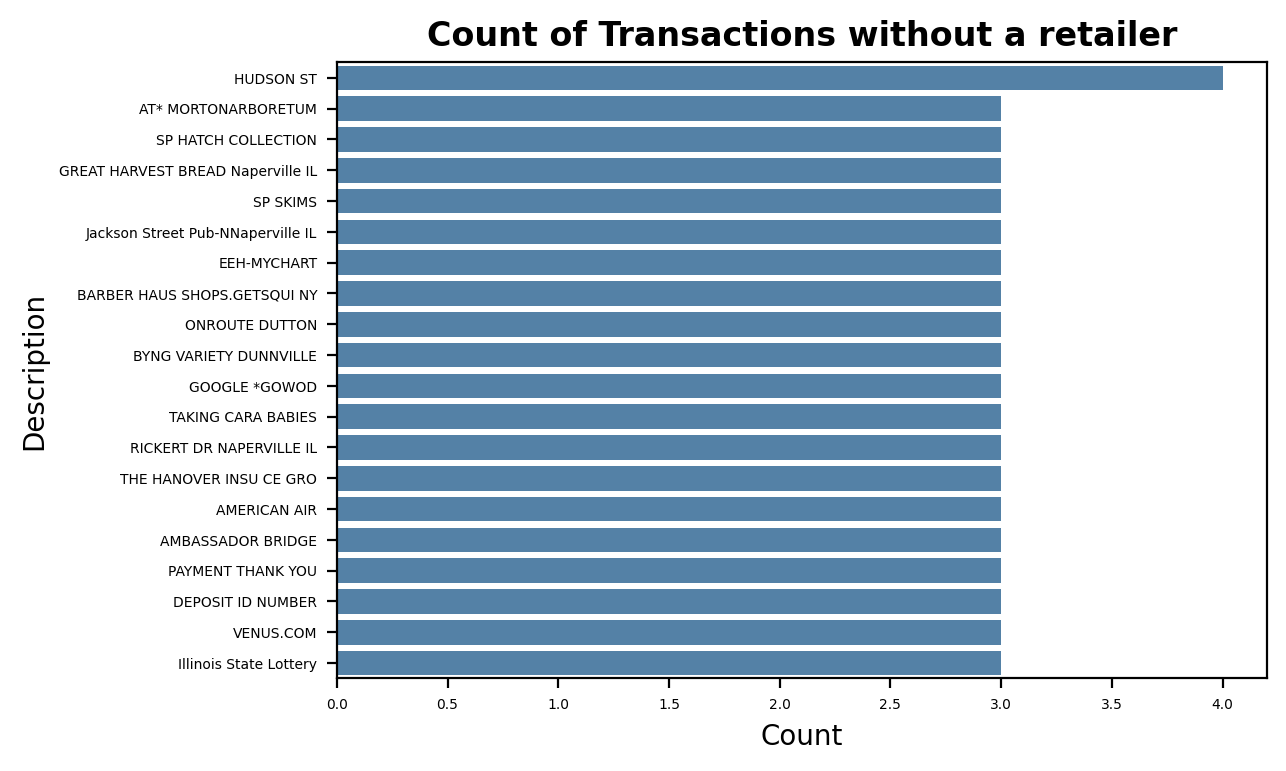

In [7]:
null_retailer_plot(df)

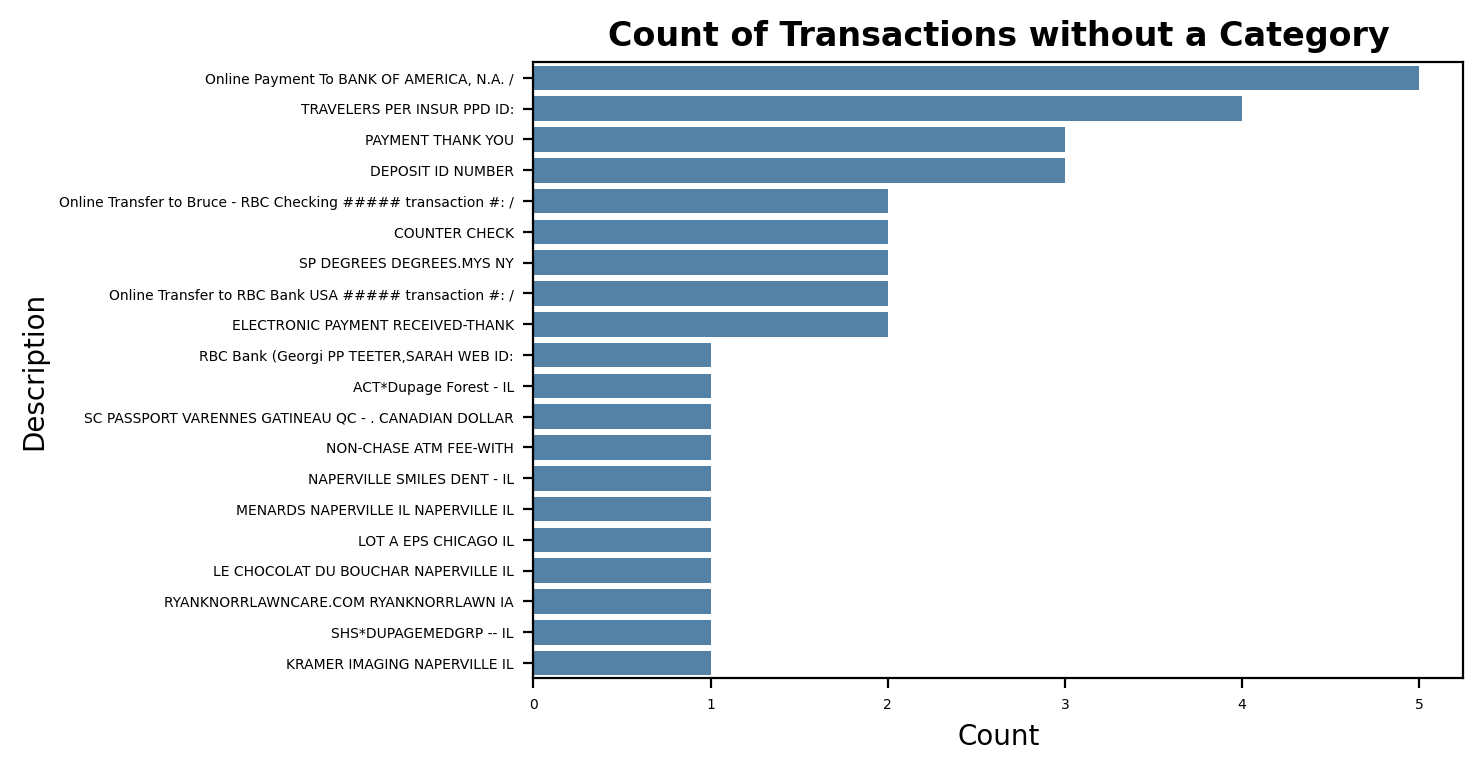

In [9]:
null_cat_plot(df)

In [10]:
map_test(df)


,original_null_count,cleaned_null_count,percent_null_count_difference
retailer,3448,568,0.84
Balance,2834,2834,0.00
not_nulls,0,0,0.00
is_recurring,0,0,0.00
month_year,0,0,0.00
year,0,0,0.00
month,0,0,0.00
month_name,0,0,0.00
clean_description,0,0,0.00
account_number,0,0,0.00


In [17]:
df.columns

Index(['Date', 'Description', 'Card Member', 'Account #', 'Amount',
       'Extended Details', 'Appears On Your Statement As', 'Address',
       'City/State', 'Zip Code', 'Country', 'Reference', 'Category',
       'file_name', 'Details', 'Type', 'Balance', 'Check or Slip #',
       'Transaction', 'Memo', 'bank', 'account_type', 'account_number',
       'clean_description', 'month_name', 'month', 'year', 'month_year',
       'is_recurring', 'not_nulls', 'retailer'],
      dtype='object')

In [26]:
test = df.groupby(['month_year','Category'])['Amount'].sum()

In [102]:
test

month_year  Category                            
Apr-2023    ATM Cash Withdrawal                      -180.00
            Bills & Utilities                        -280.07
            Car Payment                              -665.79
            Communications-Cable & Internet Comm      -12.99
            Credit Card Payments                       -6.00
                                                      ...   
Sep-2023    Restaurant-Restaurant                    -455.43
            Taxes                                  -10227.55
            Transportation-Fuel                      -192.46
            Utilities                                 -37.25
            Wholesale Stores                          -54.88
Name: Amount, Length: 821, dtype: float64

In [85]:
n_test = abs(test).groupby(level='month_year').nlargest(5).reset_index(level=0, drop=True)

In [138]:
z = n_test.reset_index()[~n_test.reset_index()['Category'].isin(['Income','Loan Payment','Credit Card Payments','Money Transfer',
                                                                 ])]

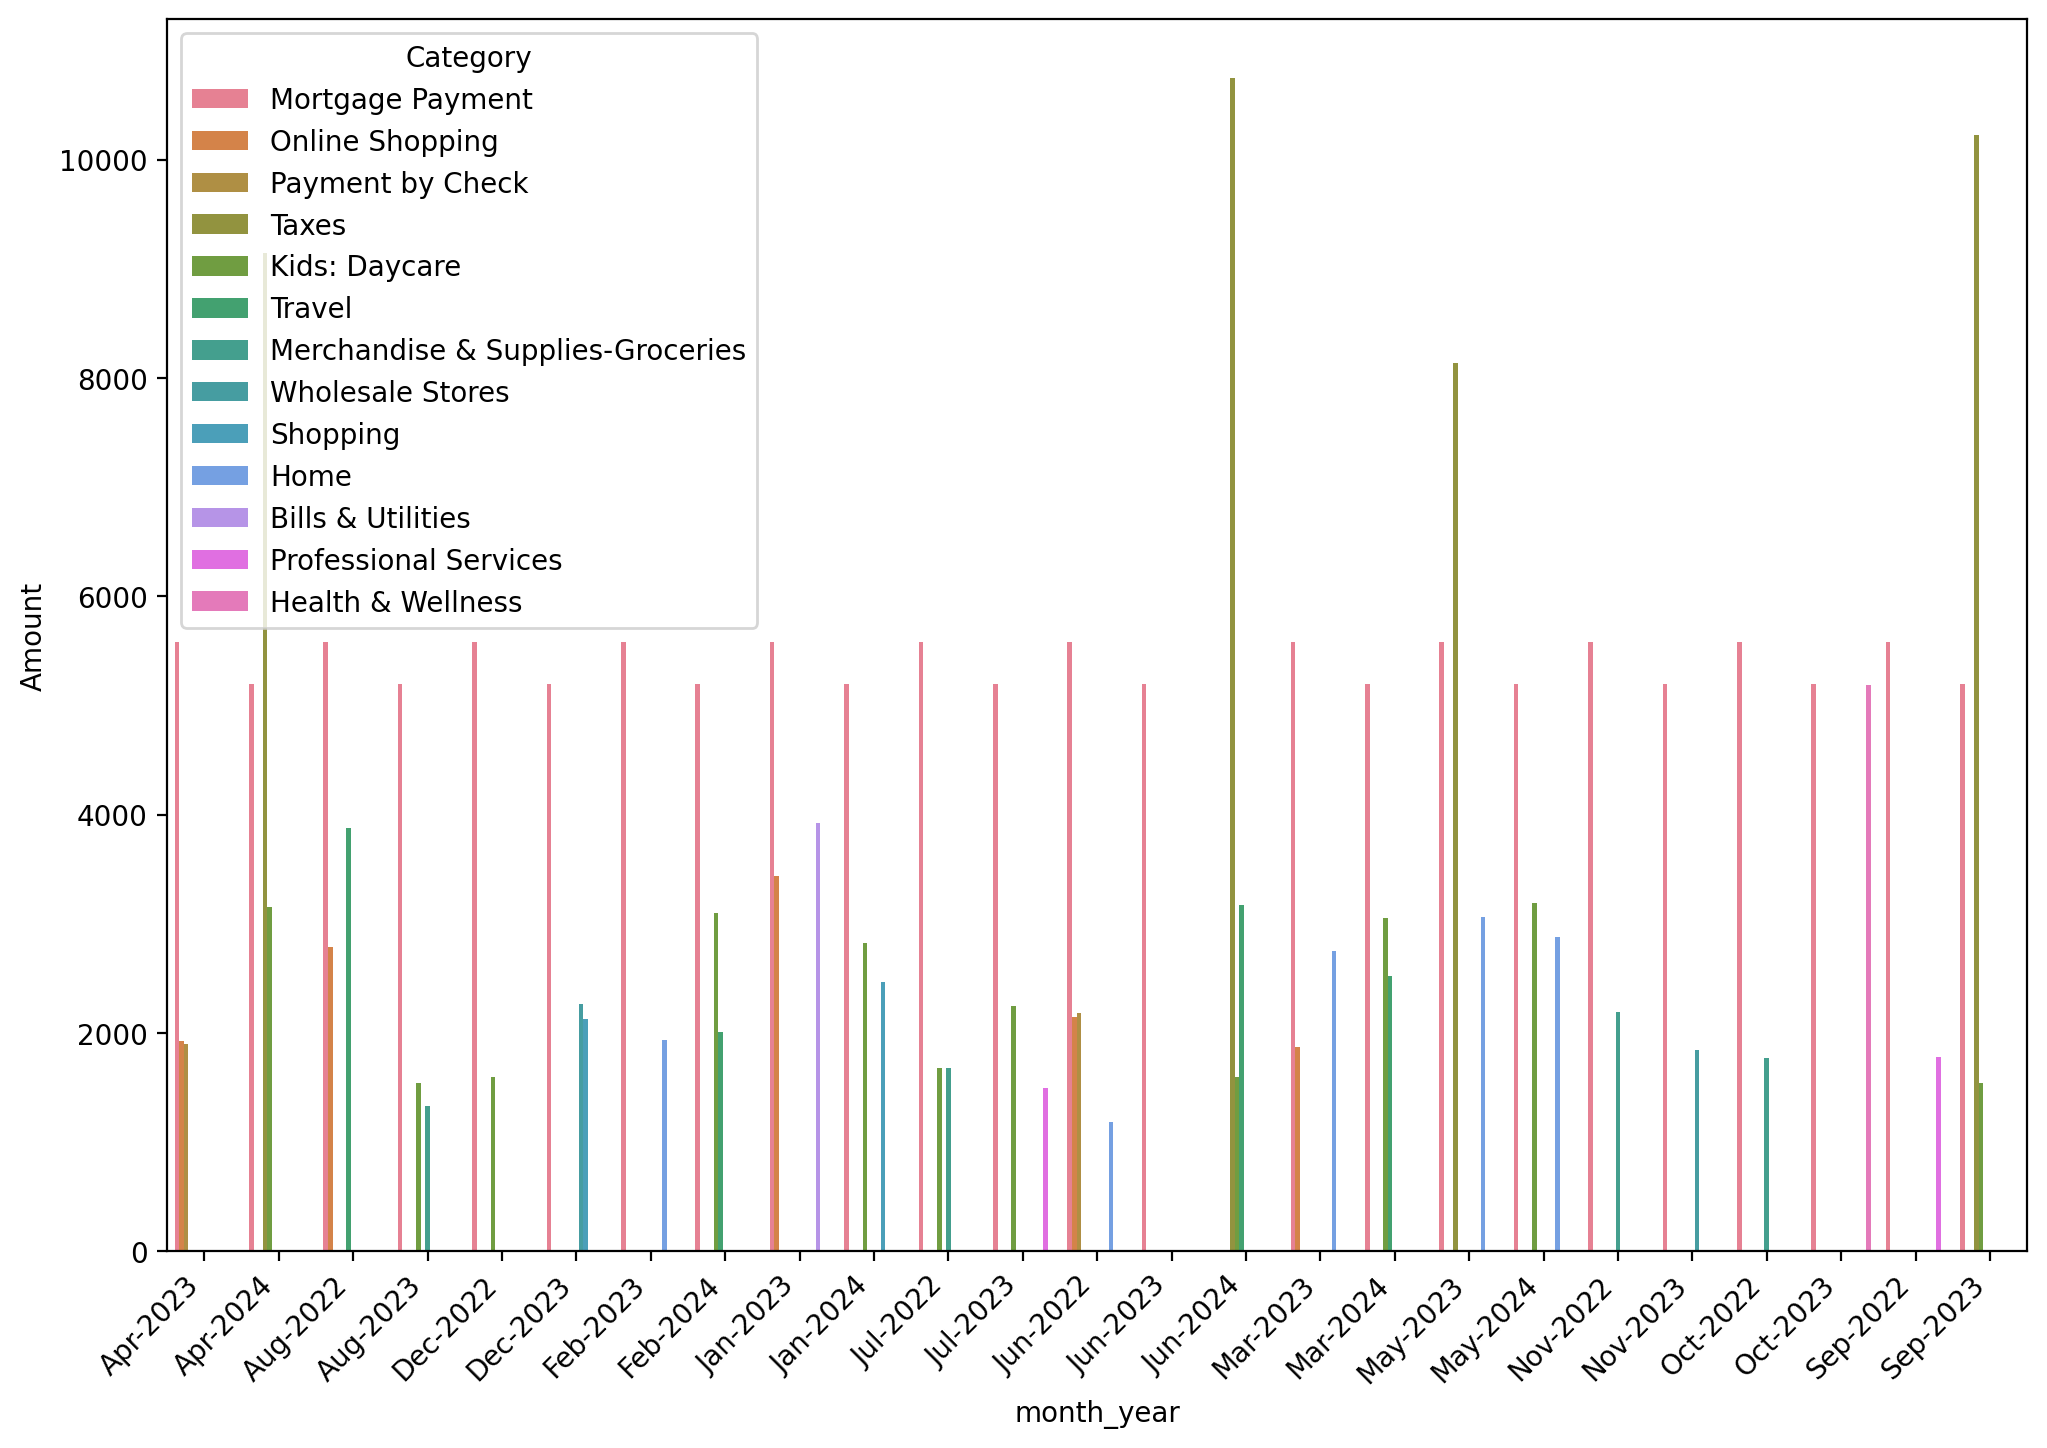

In [158]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=z, x='month_year',y='Amount', hue='Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
df.columns

Index(['Date', 'Description', 'Card Member', 'Account #', 'Amount',
       'Extended Details', 'Appears On Your Statement As', 'Address',
       'City/State', 'Zip Code', 'Country', 'Reference', 'Category',
       'file_name', 'Details', 'Type', 'Balance', 'Check or Slip #',
       'Transaction', 'Memo', 'bank', 'account_type', 'account_number',
       'clean_description', 'month_name', 'month', 'year', 'month_year',
       'is_recurring', 'not_nulls'],
      dtype='object')

In [72]:
null_cats['Description'].str.replace(r'\s+', ' ', regex=True)

12      Payment to Chase card ending in 4649 06/13
13      Payment to Chase card ending in 4434 06/13
14                         Payment Thank You - Web
15                         Payment Thank You - Web
17                                     CHECK 1770 
                           ...                    
3442       AMZN Mktp US*RD8OC1F71 Amzn.com/bill WA
3443       AMZN Mktp US*8C3TA2YA3 Amzn.com/bill WA
3444         Amazon.com*7V72Y0233 Amzn.com/bill WA
3446                TARGET 00019034 WARRENVILLE IL
3447               AMAZON.COM*7C13H8QH3 SEATTLE WA
Name: Description, Length: 1016, dtype: object

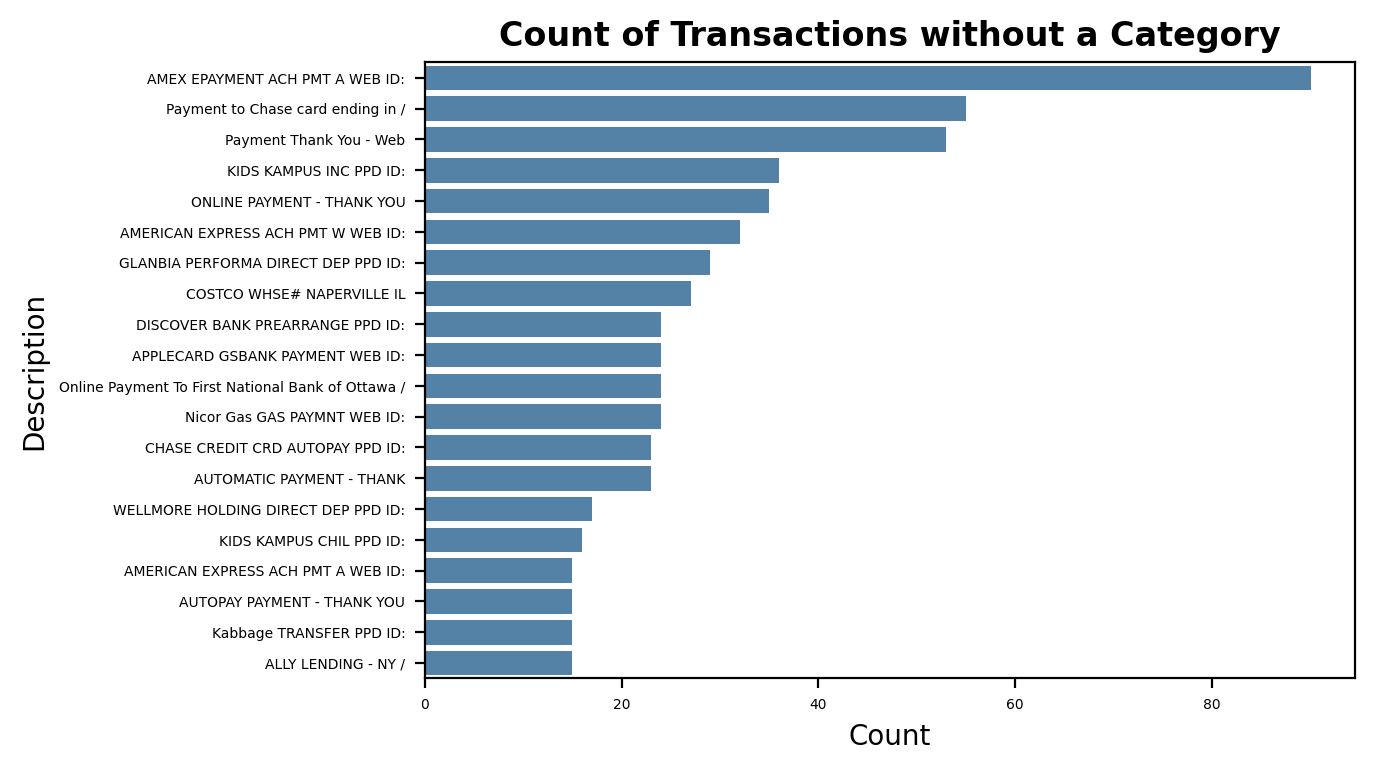

In [80]:
def null_cat_plot(frame):
    null_cats = frame.loc[frame['retailer'].isnull()]


    #Remove all numbers from the description column to remove unique identifiers that could segment the descriptions unneccessarily
    null_cats.loc[:,'Description'] = null_cats['Description'].str.replace('[0-9]','', regex=True)
    #Remove extra whitepace between Description values and replace with a single whitespace
    null_cats.loc[:,'Description'] = null_cats['Description'].str.replace(r'\s+', ' ', regex=True)
    #Remove trailing and leading whitespace
    null_cats.loc[:,'Description'] = null_cats['Description'].str.strip()


    val_counts = null_cats.value_counts('Description')

    #Plot values 
    plt.figure(figsize=(6,4),dpi=200)
    sns.barplot(y = val_counts.index[:20], x= val_counts.values[:20],color='steelblue')

    #Formatting the plot
    plt.ylabel('Description', fontdict={'weight':500})
    plt.xlabel('Count', fontdict={'weight':500})
    plt.title('Count of Transactions without a Category',fontdict={'weight':900},loc='center')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=5)
    
    return plt.show()

cat_plot(df)

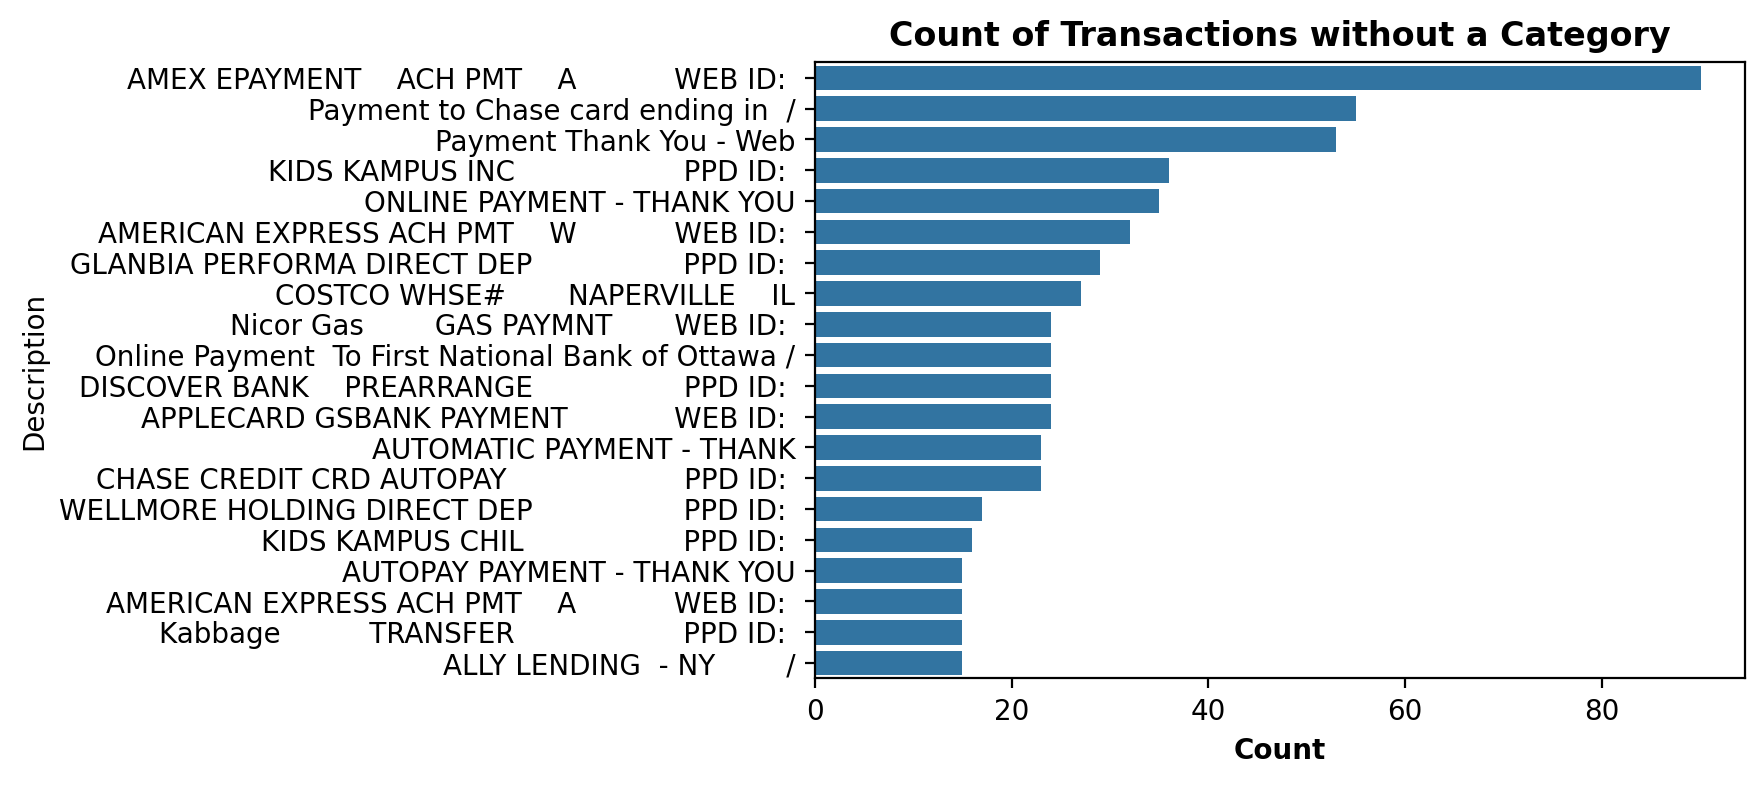

In [40]:
cat_plot(df)



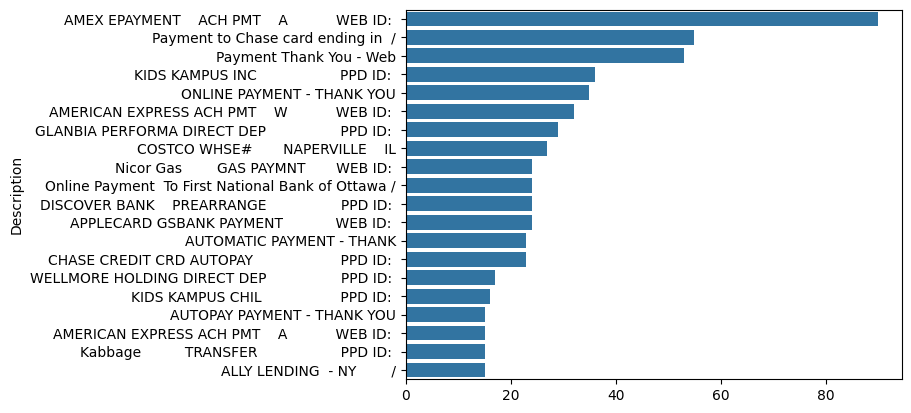

In [18]:
sns.barplot(y = val_counts.index[:20], x= val_counts.values[:20])
p = plt.show()

In [16]:
df[df['Description'].str.contains('Amex Epayment',case=False)]

,Date,Description,Card Member,Account #,Amount,Extended Details,Appears On Your Statement As,Address,City/State,Zip Code,Country,Reference,Category,file_name,Details,Type,Balance,Check or Slip #,Transaction,Memo,bank,account_type,account_number,clean_description,month_name,month,year,month_year,is_recurring,not_nulls
67,2022-06-24,AMEX EPAYMENT ACH PMT A1030 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,28335.27,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1030 WEB ID: 6133133497,June,6.0,2022.0,Jun-2022,0.0,16
81,2022-06-27,AMEX EPAYMENT ACH PMT A1460 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,22195.79,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1460 WEB ID: 6133133497,June,6.0,2022.0,Jun-2022,0.0,16
111,2022-07-01,AMEX EPAYMENT ACH PMT A1920 WEB ID: 6133133497,NaN,NaN,-645.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,18253.14,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1920 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,0.0,16
231,2022-07-25,AMEX EPAYMENT ACH PMT A6780 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,16991.76,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A6780 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,0.0,16
244,2022-07-27,AMEX EPAYMENT ACH PMT A1590 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,10272.73,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1590 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,1.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2024-05-01,AMEX EPAYMENT ACH PMT A2340 WEB ID: 6133133497,NaN,NaN,-645.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,10634.06,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A2340 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3347,2024-05-28,AMEX EPAYMENT ACH PMT A0624 WEB ID: 6133133497,NaN,NaN,-683.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,9262.49,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A0624 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3348,2024-05-28,AMEX EPAYMENT ACH PMT A5042 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,8080.39,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A5042 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3358,2024-05-28,AMEX EPAYMENT ACH PMT A0594 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,9945.53,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A0594 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
